# データ初期化作業
データの読み込みを行う。

| Index | Param | Description |
|---|---|---|
| 0 | Case Index |  |
| 1 | Gender |  |
| 2 | Age |  |
| 3 | Height |  |
| 4 | Weight |  |
| 5 | MaxBP |  |
| 6 | MinBP |  |
| 7 | BTResult | 1.Normal 2.Needs Observation 3.Needs Advice 4.Doctor Consultation required |
| 8 | HTResult | 1.Normal 2.Needs Observation 3.Needs Advice 4.Doctor Consultation required |
| 9 | BMI | Weight/(Height)^2 |

In [31]:
import csv
import pprint

data = []
with open("data_original.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        d = [int(row[0])]
        if row[1] == '男':
            d.append(0)
        else:
            d.append(1)
        for p in row[2:]:
            d.append(int(p))
        d.append(d[4] / pow(d[3], 2) * pow(10, 4))
        data.append(d)
pprint.pprint(data[:5])

[[1, 0, 53, 167, 75, 144, 80, 4, 4, 26.89232313815483],
 [2, 1, 55, 153, 64, 143, 110, 4, 3, 27.33991199965825],
 [3, 0, 43, 168, 68, 119, 90, 2, 2, 24.09297052154195],
 [4, 0, 28, 175, 72, 115, 82, 1, 1, 23.510204081632654],
 [5, 1, 29, 160, 48, 120, 80, 1, 1, 18.75]]


# 方針
## 作成する散布図
- BPResultとBMIの関係
- MaxBP, MinBP, BTResultの関係→平均を求める?

In [24]:
from statistics import mean, median, variance, stdev

print(len(data))
print(data[2])

50
9.9


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

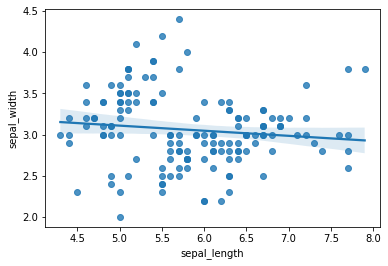

In [26]:
# library & dataset
import seaborn as sns

df = sns.load_dataset('iris')

# use the function regplot to make a scatterplot
sns.regplot(x=df["sepal_length"], y=df["sepal_width"])